## Цель и описание задачи

В целях увеличения выручки вместе с отделом маркетинга выполнить анализ крупного интернет-магазина. 
Приоритизируовать гипотезы, запустить A/B-тест и проанализировать результаты.

## Описание данных

Hypothesis — краткое описание гипотезы;
Reach — охват пользователей по 10-балльной шкале;
Impact — влияние на пользователей по 10-балльной шкале;
Confidence — уверенность в гипотезе по 10-балльной шкале;
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.
transactionId — идентификатор заказа;
visitorId — идентификатор пользователя, совершившего заказ;
date — дата, когда был совершён заказ;
revenue — выручка заказа;
group — группа A/B-теста, в которую попал заказ;
date — дата;
group — группа A/B-теста;
visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

# Часть 1. Приоритизация гипотез. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import random
from datetime import date, timedelta
import scipy.stats as stats

## 1.1. Загрузим данные о гипотезах по увеличению выручки интернет-магазина

In [2]:
hypothesis = pd.read_csv(r"/datasets/hypothesis.csv")
print(hypothesis.info())
display(hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Данные загружены и не требуют последующей обработки 

##  1.2. Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета

In [3]:
hypothesis['ICE']=(hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
hypothesis=hypothesis.sort_values(by='ICE', ascending=False)
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


Наиболее перспективные гипотезы по параметру ICE: гипотезы 8,0,7. У них самые высокие параметры Impact и Confidence при среднем значении Efforts.

##  1.3. Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета

In [4]:
hypothesis['RICE']=(hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
hypothesis=hypothesis.sort_values(by='RICE', ascending=False)
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


### Наиболее перспективные гипотезы по параметру RICE: гипотезы 7,2,0. Параметр Reach откинул назад гипотезу 8. Это стоит учесть, так как охват пользователей очень важен. В итоге гипотезы 7 и 2 остались на первых местах, а гипотезезы 4 и 5 в самом конце ( цветом фона уже никого не удивишь, а отзывы вызывают явное недоверие).

# Часть 2. Анализ A/B-теста 

## 2.1. Загрузим данные о заказах и посещениях

In [5]:
orders = pd.read_csv(r"/datasets/orders.csv")
print(orders.info())


visitors = pd.read_csv(r"/datasets/visitors.csv")
print(visitors.info())
display(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


## 2.2. Переведем даты в формат даты и времени

In [6]:
orders["date"]=pd.to_datetime(orders["date"])
print(orders.info())
visitors["date"]=pd.to_datetime(visitors["date"])
print(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


## 2.3. Построим график кумулятивной выручки по группам. 

создаем массив уникальных пар значений дат и групп теста

In [7]:
datesGroups=orders[['date','group']].drop_duplicates()

Соберём агрегированные кумулятивные данные  о заказах

In [8]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Соберём агрегированные кумулятивные  о посетителях интернет-магазина

In [9]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

объединяем кумулятивные данные в одной таблице

In [10]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


Определим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А

In [11]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

Определим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе В

In [12]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

Построим график кумулятивной выручки по группам. 

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'dollars')

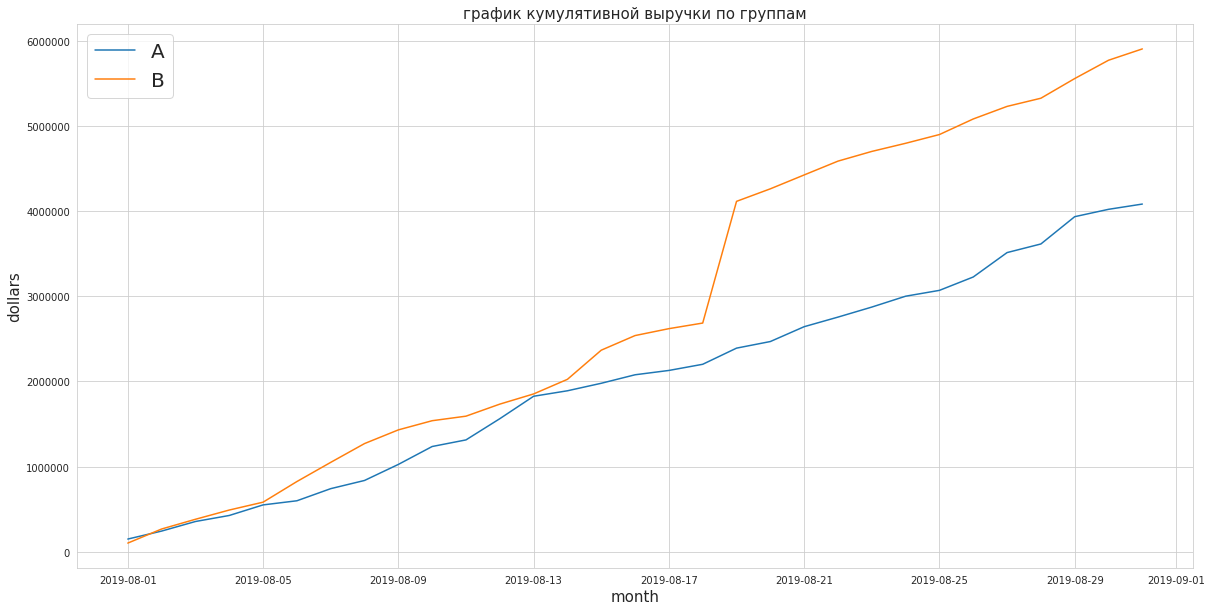

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
cmap = plt.get_cmap('viridis')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend(loc='upper left',fontsize=20)
plt.title('график кумулятивной выручки по группам',fontsize=15)
plt.xlabel("month",fontsize=15)
plt.ylabel('dollars',fontsize=15)

### Выручка почти равномерно увеличивается в течение всего теста. Однако в один момент выручка группы В делает резкий скачок, после чего продолжает возрастать с прежним трендом. Это может означать либо всплеск числа заказов, либо аномально дорогие заказы. Такие данные могут являться выбросами. Для группы А,в свою очередь,мы видим небольшое снижение тенденции роста 13 числа. Нам предстоит это проверить.

## 2.4. Построим график кумулятивного среднего чека по группам.

Text(0, 0.5, 'dollars')

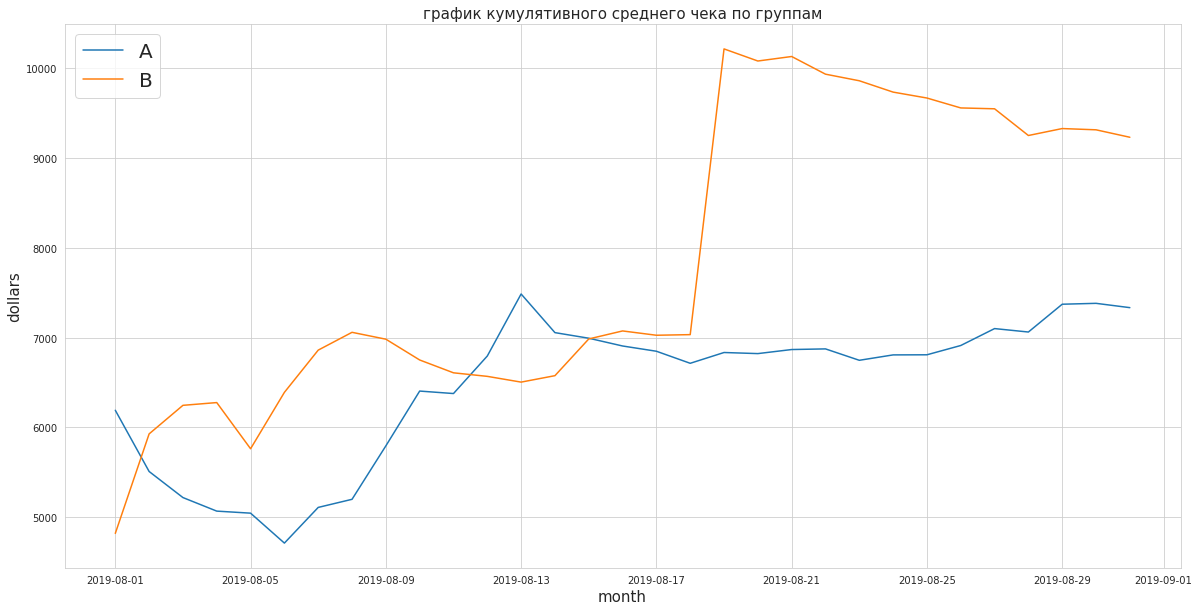

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
cmap = plt.get_cmap('viridis')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend(loc='upper left',fontsize=20)
plt.title('график кумулятивного среднего чека по группам',fontsize=15)
plt.xlabel("month",fontsize=15)
plt.ylabel('dollars',fontsize=15)

### Здесь мы еще более явно видим резкий скачок среднего чека группы В и и практически остановку роста среднего чека группы А  и В( рост выручки которых, судя по всему, происходил из-за роста числа покупателей)

## 2.5. Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

Объединим данные по обеим группам в один датафрейм

In [15]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

Text(0, 0.5, 'relative untits')

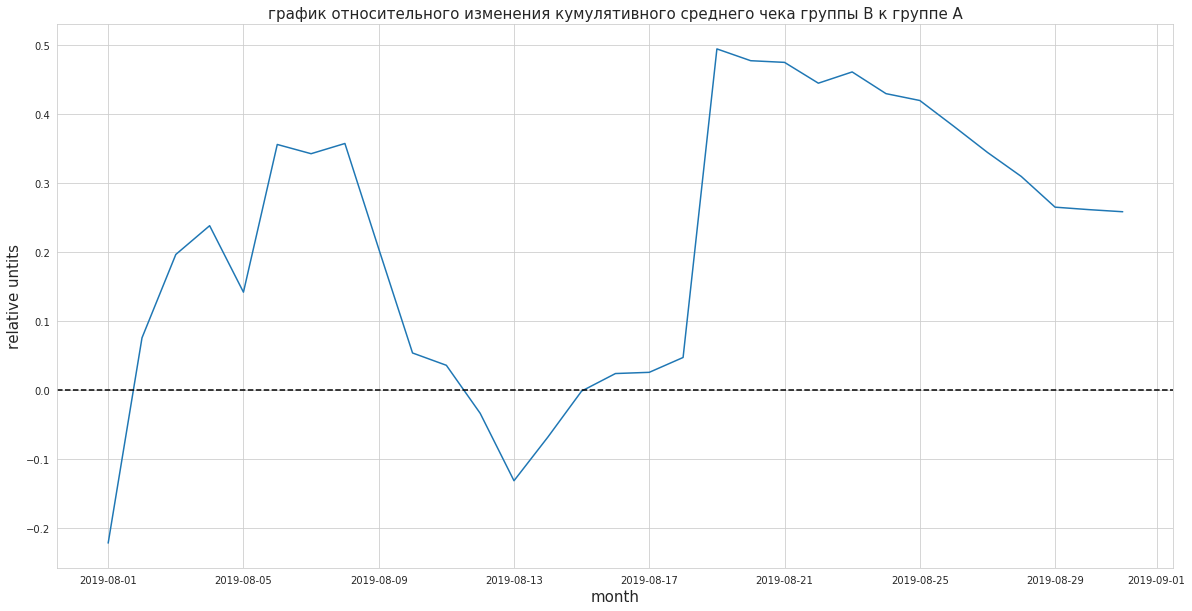

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
cmap = plt.get_cmap('viridis')
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('график относительного изменения кумулятивного среднего чека группы B к группе A',fontsize=15)
plt.xlabel("month",fontsize=15)
plt.ylabel('relative untits',fontsize=15)

###  Почти весь рассматриваемый период группа В превосходит группу А. Однако 13 августа виден резкий скачок среднего чека группы А. Затем мы наблюдаем тот самый ( почти вертикальный) рост группы В. 18 августа явно день, когда в группе В произошли крупные покупки.

##  2.6. Построим график кумулятивной конверсии по группам.

считаем кумулятивную конверсию

In [17]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

отделим данные по группе A и В

In [18]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

Построим график кумулятивной конверсии по группам

['2019-08-01', '2019-08-31', 0.028, 0.04]

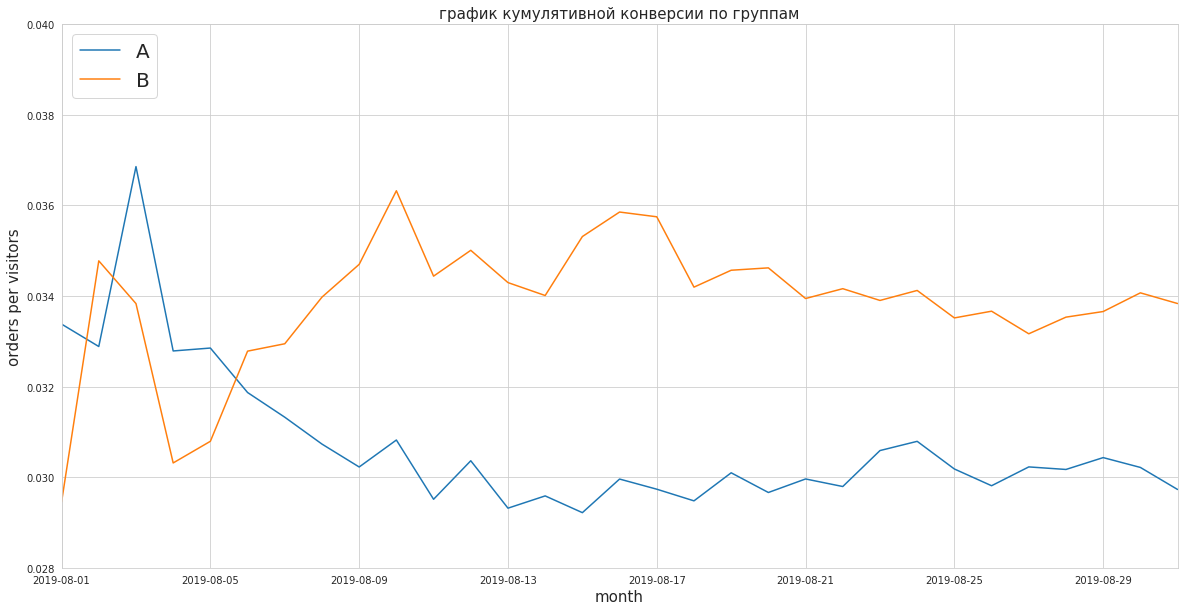

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
cmap = plt.get_cmap('viridis')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend(loc='upper left',fontsize=20)
plt.title('график кумулятивной конверсии по группам',fontsize=15)
plt.xlabel("month",fontsize=15)
plt.ylabel('orders per visitors',fontsize=15)
plt.axis(["2019-08-01", '2019-08-31', 0.028, 0.04])

###  Группы колебались около одного значения, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

##  2.7. Построим график относительного изменения кумулятивной конверсии группы B к группе A

Text(0, 0.5, 'relative untits')

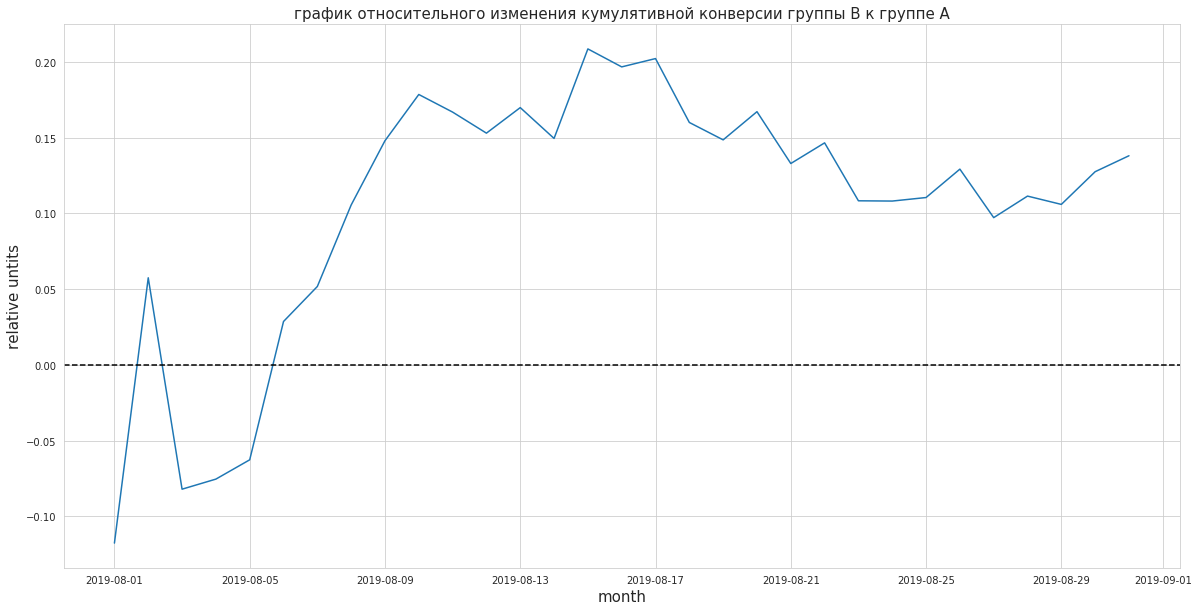

In [20]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
cmap = plt.get_cmap('viridis')
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('график относительного изменения кумулятивной конверсии группы B к группе A',fontsize=15)
plt.xlabel("month",fontsize=15)
plt.ylabel('relative untits',fontsize=15)

###  В первый момент конверсия группы В резко вырвалась вперед относительно конверсии группы А, затем незначительно упала, после чего вырвалась вперед и стабилизировалась.

## 2.8. Построим точечный график количества заказов по пользователям.

Text(0, 0.5, 'orders_count')

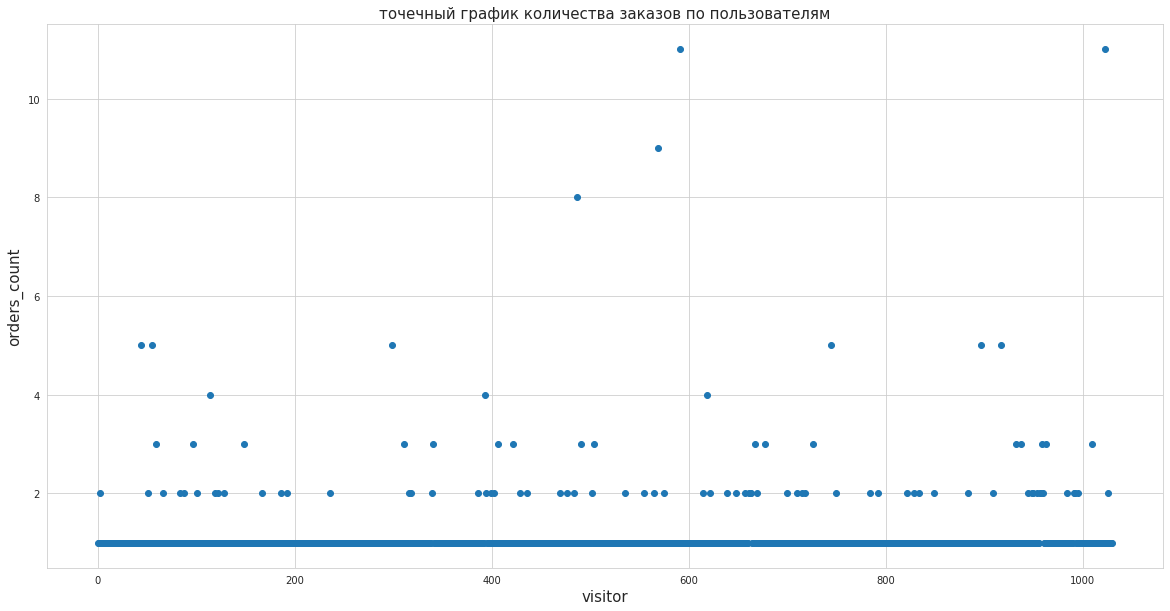

In [21]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['visitorId','orders']
x_values = pd.Series(range(0,len(ordersByUsers)))
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('точечный график количества заказов по пользователям',fontsize=15)
plt.xlabel("visitor",fontsize=15)
plt.ylabel('orders_count',fontsize=15)



###  Большинство пользователей делает заказ один раз. Чуть меньше людей совершает покупку на сайте два раза,  и совсем мало- три раза. Количество заказов больше четырех, скорее всего, уже можно будет считать выбросом данных.

##  2.9. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и выберем границу для определения аномальных пользователей

In [22]:
print("95 перцентиль количества заказов на пользователя равен {}".format(np.percentile(ordersByUsers['orders'], [95][0])))
print()
print("99 перцентиль количества заказов на пользователя равен {}".format(np.percentile(ordersByUsers['orders'], [99][0])))

95 перцентиль количества заказов на пользователя равен 2.0

99 перцентиль количества заказов на пользователя равен 4.0


###  Не более 5% пользователей совершило больше 2 заказов, и не более 1% пользователей совершило больше 4 заказов.

##  2.10. Построим точечный график стоимостей заказов

Text(0, 0.5, 'revenue')

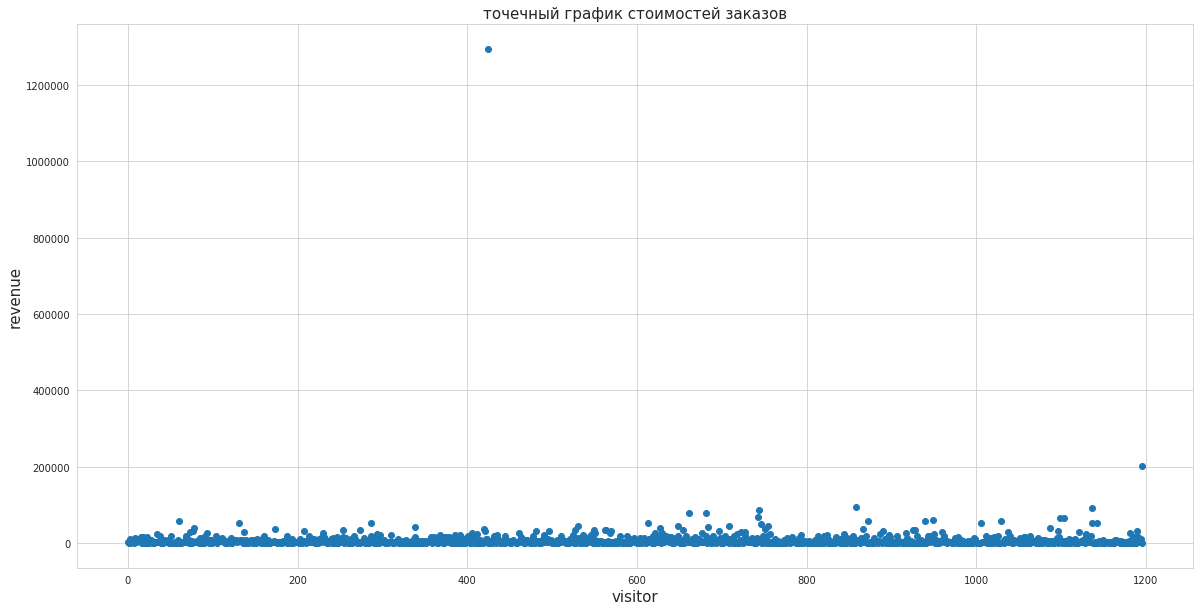

In [23]:
x_values = pd.Series(range(0,len(orders['revenue'])))
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.scatter(x_values, orders['revenue'])
plt.title('точечный график стоимостей заказов',fontsize=15)
plt.xlabel("visitor",fontsize=15)
plt.ylabel('revenue',fontsize=15)


###  Мы видим наличие небольшого количества заказов около 100 000 у.е., а так же редкие выбросы по 200 000 у.е. и 1 200 000 у.е.

##  2.11. Посчитаем 95-й и 99-й перцентили стоимости заказов и выберем границу для определения аномальных заказов

In [24]:
print("95 перцентиль стоимости заказов  равен {}".format(np.percentile(orders['revenue'], [95][0])))
print()
print("99 перцентиль стоимости заказов равен {}".format(np.percentile(orders['revenue'], [99][0])))

95 перцентиль стоимости заказов  равен 28000.000000000004

99 перцентиль стоимости заказов равен 58233.19999999999


###  Не более 5% стоимости заказов дороже 28 000 у.е , и не более 1% стоимости заказов дороже 58 233 у.е.

##  2.12. Посчитаем статистическую значимость различий в конверсии между группами по "сырым» данным"

Выполним подготовку данных

In [25]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', as_index=False).agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(lambda x:ordersADaily[ordersADaily['date'] <= x['date']].agg({'date' : 'max','ordersPerDateA' : 'sum','revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', as_index=False).agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(lambda x:ordersBDaily[ordersBDaily['date'] <= x['date']].agg({'date' : 'max','ordersPerDateB' : 'sum','revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

Создадим переменные ordersByUsersA и ordersByUsersB. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [26]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [27]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [39]:
display(sampleA)

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18736, dtype: int64

###  Сформулируем нулевую гипотезу: в конверсии между группами нет статистически значимых различий.

###  Сформулируем альтернативную гипотезу: в конверсии между группами есть статистически значимые различия.

###  Примем коэффициент alpha равным  0.05

 Рассчитаем p-value для сравнения конверсии между группами

In [29]:
print("p-value  конверсий между группами  равно {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
alpha = 0.05
if (stats.mannwhitneyu(sampleA, sampleB)[1]) < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")



p-value  конверсий между группами  равно 0.008
Отвергаем нулевую гипотезу


Рассчитаем относительное различие в конверсии между группами

In [30]:
print("относительное различие в конверсии между группами  равно {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

относительное различие в конверсии между группами  равно 0.138


###  p-value значительно меньше 0.05. Отвергаем нулевую гипотезу, т.к.в конверсии между группами есть статистически значимые различия.

###  Относительный прирост конверсии группы B к группе А равен 13.8%.

##  2.13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по  "сырым» данным"

###  Сформулируем нулевую гипотезу: в среднем чеке заказа между группами нет статистически значимых различий.

###  Сформулируем альтернативную гипотезу: в среднем чеке заказа между группами есть статистически значимые различия.

###  Примем коэффициент alpha равным  0.05

Рассчитаем p-value для сравнения средних чеков между группами

In [31]:
print("p-value  средних чеков группами  равно {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
alpha = 0.05
if (stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]) < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value  средних чеков группами  равно 0.365
Не получилось отвергнуть нулевую гипотезу


In [32]:
print("относительное различие в средних чеках между группами  равно {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))



относительное различие в средних чеках между группами  равно 0.259


###  p-value больше 0.05. Принимаем нулевую гипотезу, т.к. статистически значимых различий в среднем чеке заказа между группами нет.

###  Однако относительное различие в среднем чеке между группами B и А составляет 25.9%.

##  2.14. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

###  Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 30 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.

In [33]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

###  Сформулируем нулевую гипотезу: в конверсии между группами нет статистически значимых различий.

###  Сформулируем альтернативную гипотезу: в конверсии между группами есть статистически значимые различия.

###  Примем коэффициент alpha равным  0.05

Применим статистический критерий Манна-Уитни к полученным выборкам

In [34]:
print("p-value  конверсий между группами  равно {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
alpha = 0.05
if (stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]) < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value  конверсий между группами  равно 0.007
Отвергаем нулевую гипотезу


Рассчитаем относительное различие в конверсии между группами

In [35]:
print("относительное различие в конверсии между группами  равно {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

относительное различие в конверсии между группами  равно 0.172


###  p-value значительно меньше 0.05. Отвергаем нулевую гипотезу, т.к.в конверсии между группами есть статистически значимые различия.

###  Относительный прирост конверсии группы B к группе А равен 17.2%.

###  Можно сделать вывод, что результаты по конверсии практически не изменились.

##  12.15. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

###  Сформулируем нулевую гипотезу: в среднем чеке заказа между группами нет статистически значимых различий.

###  Сформулируем альтернативную гипотезу: в среднем чеке заказа между группами есть статистически значимые различия.

###  Примем коэффициент alpha равным  0.05

Рассчитаем p-value для сравнения средних чеков между группами

In [36]:
print("p-value  средних чеков группами  равно {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))
alpha = 0.05
if (stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]) < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value  средних чеков группами  равно 0.360
Не получилось отвергнуть нулевую гипотезу


In [37]:
print("относительное различие в средних чеках между группами  равно {0:.3f}".format(orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

относительное различие в средних чеках между группами  равно -0.023


###  p-value больше 0.05. Принимаем нулевую гипотезу, т.к. статистически значимых различий в среднем чеке заказа между группами нет.

###  Однако относительное различие в среднем чеке между группами B и А составляет -2.3%.( по сырым данным эта величина равнялась 25.9%)

###  Мы видим, что p-value не изменилось, но относительное различие в среднем чеке между группами сильно упала при очищении данных от выбросов.

##  2.16. Примем решение по результатам теста

###   Мы располагаем следующими фактами:
###   1) Есть статистически значимое различие по конверсии между группами, как по сырым данным, так и после фильтрации аномалий.
###   2)График различия конверсии между группами сообщает, что в первый момент конверсия группы В резко возросла относительно конверсии группы А, затем незначительно упала, после чего вырвалась вперед и стабилизировалась.
###   3) Нет статистически значимого различия по  по среднему чеку  между группами, как по сырым данным, так и после фильтрации аномалий.
###   4) Относительное различие в средних чеках между группами сводится к миниму после фильтрации выбросов данных.

###  Исходя из вышеизложенного можно сделать вывод, что группа B статистически значимо лучше группы A по одной из метрик (конверсия) . По второй метрике ( средний чек) разницы между двумя группами нет.  Графики относительного изменения кумулятивной конверсии и  относительного изменения кумулятивного среднего чека группы B к группе A говорят о фиксации результата.  Следовательно, необходимо остановить тест и признать его успешным.

# Часть 3. Общий вывод. 

###  1) Мы рассмотрели гипотезы по увеличению выручки интернет-магазина, применили ICE  и RICE  фреймфорки и определили, что наилучшими гипотезами являются: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".
###  2) Мы провели анализ A/B-теста и выявили,что группа B статистически значимо лучше группы A по одной из метрик (конверсия) . По второй метрике ( средний чек) разницы между двумя группами нет.  Графики относительного изменения кумулятивной конверсии и  относительного изменения кумулятивного среднего чека группы B к группе A говорят о фиксации результата. Тест был остановлен и признан успешным.
